#Table of Contents



1.   Importing Project Dependencies
  1.   Mounting the Drive
  2.   Importing the necessary Python Libraries

2.   Setting up the Datasets
  1.   Set Path
  2.   Function to Load Files

3.   Pre-processing Steps
  1.   Identifying Stopwords
  2.   Clean Function

4.   Part-Of-Speech Tagging
  1.   All Parts-of-Speech Tagging
  2.   Noun-Adjective Part-of-speech Tagging

5.   Defining the Word2Vec Continuous Skip-gram Model

6.   Visualising elements of Word2Vec Model
  1.   Calculating the Cosine Distance, Cosine Similarity and plotting a Heat-map to visualise the cosine similarities
  2.   Most similar words using Gensim Inbuilt Function
  3.   TSNE
  4.   Plotting TSNE
  5.   Interpretation of the TSNE-plot graph

7.   Helper functions for Embedding as features in Neural Model
  1.   Map words to their corresponding IDs
  2.   Getting Integer Model
  3.   Adding Missing Words (if any)

8.   Training the Classifying Neural Network Model
9.   Evaluation of the model
  1.   Classification Report
  2.   ROC - AUC Score and Curve
10. Output Result  





#1. Importing Project Dependencies



*   Mounting the Drive







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive






*   Importing the Libraries





In [ ]:
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
from gensim.models import Word2Vec
import multiprocessing
nltk.download('averaged_perceptron_tagger')
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten
import tensorflow as tf
import collections
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet') 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#2. Setting up the Dataset



*   Set Path



In [ ]:
import glob
path = '/content/drive/My Drive/Practicum_Data/'

In [ ]:
files = glob.glob(path+'*.csv')



*   Function to load all CSV files into a dataframe from set path



In [ ]:
def loadData(files):
  '''
  This  function loads all CSV files into a dataframe from the set path.
  '''
  comments = []
  for f in files:
    df = pd.read_csv(f)
    for review in df['Comment']:
      comments.append(review)
    df = pd.DataFrame() 
  return comments

In [ ]:
com = loadData(files)
train, test = train_test_split(com, test_size = 0.3)

In [ ]:
len(train), len(test)

(944, 405)

# 3. Pre-processing



*   Identifying Stopwords


> There is also a corpus of stopwords, that is, high-frequency words like the, to and also that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts. (https://www.nltk.org/book/ch02.html)





In [ ]:
stop_words=nltk.corpus.stopwords.words('english')
custom_stopwords=['i','u','pm','am','nd', 'ga', 'th']
for words in custom_stopwords:
  stop_words.append(words)



*   Function to clean text from the CSV files


> In this function, we first tokenize each sentence of the review. Using the LOWER method of string class, we change the case of each word. Punctuations can make the text a bit confusing for the system to understand. 
So, for this assignment we have removed all punctuations in the text. To do so, we have made use of Punctuations method from string class. We have also removed the non-alphabetic texts using ISALPHA() method.
At last, we have removed the STOPWORDS which occur quite often in the coprus. And voila! we now have clean texts from the raw scrapped data.








In [ ]:
def clean(text):
  '''
  This function will clean the text by splitting texts in words to remove punctuations and stopwords.
  '''
  c = []
  corpus = []
  for sent in text:
    #Splitting into words
    tokens = word_tokenize(sent)
    
    #Converting into lower case
    tokens = [w.lower() for w in tokens]

    #removing punctuations
    import string
    table = str.maketrans("", "", string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    #removing non-alphabetic tokens
    words = [word for word in stripped if word.isalpha()]

    #filtering stopwords
    words = [w for w in words if not w in stop_words]

    c.append(words)
  
  for i in range(0, len(c)):
    for j in c[i]:
      corpus.append(j)
  
  return corpus

In [ ]:
cleanText = clean(com)
trainCorpus = clean(train)
testCorpus = clean(test)

In [ ]:
len(trainCorpus), len(testCorpus), len(cleanText)

(63689, 27173, 90862)

#4. Part of Speech Tagging



> The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. (http://www.nltk.org/book/ch05.html)





*  Part-of-Speech Tagging



In [ ]:
posTrain = nltk.pos_tag(trainCorpus)
posTest = nltk.pos_tag(testCorpus)

In [ ]:
pos = nltk.pos_tag(cleanText)

In [ ]:
len(posTrain), len(posTest), len(pos)

(63689, 27173, 90862)

*   Adjective-Noun Tagging






> Since most, aspect terms are in the form of Nouns and their attributes are in the form of Adjectives. We will be only using Adjective-Noun pairs for our study.
(https://www.aclweb.org/anthology/D17-1058.pdf)



In [ ]:
def nounAdjective(lists):
  '''
  This function that picks Adjectives --> JJ/JJS/JJR tag words and Nouns --> NNS/NNP/NN/NNPS tag words from the training/testing corpus.
  '''
  nounAdj = []
  #for i in range(0, len(lists)):
  for word, tag in lists:
    if (tag==('NN' or 'NNS' or 'NNP' or 'NNPS')):
      n = (word, tag)
      nounAdj.append(n)
    elif (tag == ('JJ' or 'JJR' or 'JJS')):
      adj = (word, tag)
      nounAdj.append(adj)
  return nounAdj

In [ ]:
adjNounTrain = nounAdjective(posTrain)
adjNounTest = nounAdjective(posTest)
adjNoun = nounAdjective(pos)

In [ ]:
len(adjNoun), len(adjNounTest), len(adjNounTrain)

(51028, 15289, 35719)

#5. Defining the Word2Vec Model



> A small brief on the parameters of the Word2Vec model


*   **Size**: The dimensionality of our embeddings. Since, there isn’t a single best value suiting all applications. We have set the size at 300.
*   **Window**: This determines which words are considered contexts for the target. The n words to the right and to the left are considered as context words
*   **Min_count**: This parameter is a threshold value that tells the model if frequency of a word is less than the min_count, it should be ignored.
*   **Negative**: It defines the incorrect training pair instances.
*   **Iter**: It is the same as the concept of Epochs.
*   **Workers**: Number of threads that will be used to train the model, in our case to avoid frequent crashing of Google Colab Notebook, using the Multiprocessing library we deploy as many threads as the cpu_count.




In [ ]:
dim = 300
w2v = Word2Vec(adjNounTrain, size=dim, window=5,
               min_count=1, negative = 15, iter=10, 
               compute_loss = True,
               workers = multiprocessing.cpu_count())



> Getting the Keyed Vectors of the Word2Vec Model



In [ ]:
word_vector = w2v.wv

# 6. Visualising elements of the Word2Vec Model



*   Calculating the Cosine Distance, Cosine Similarity and plotting a Heat-map to visualise the cosine similarities


In [ ]:
def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(w2v[word1], w2v[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    '''
    This function calculcates  heat matrix based on the cosine distances of words from one another.
    '''
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    '''
    Returns the cosine similarity index.
    '''
    vector_1 = np.mean([w2v[word] for word in s1],axis=0)
    vector_2 = np.mean([w2v[word] for word in s2],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')

def heat_map_matrix_between_two_sentences(s1,s2):
    '''
    Plots the heat matrix.
    '''
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

Separating Adjective and Noun words for comparision

In [ ]:
adjTest =[]
nounTest =[]
for w, t in adjNounTest:
  if t == 'JJ':
    adjTest.append(w)
for w,t in adjNounTrain:
  if t == 'NN':
    nounTest.append(w)

Top 5 Adjective and Noun Words

In [ ]:
vectorizer2 = TfidfVectorizer(max_features=5)
X2 = vectorizer2.fit_transform(adjTest)
words2 = vectorizer2.get_feature_names()
vectorizer3 = TfidfVectorizer(max_features=5)
X3 = vectorizer3.fit_transform(nounTest)
words3 = vectorizer3.get_feature_names()

In [ ]:
words2, words3

(['comfortable', 'good', 'great', 'last', 'new'],
 ['airline', 'flight', 'service', 'staff', 'time'])

Cosine Distance between the words

In [ ]:
cosine_distance_wordembedding_method(words2,words3)

Word Embedding method with a cosine distance asses that our two sentences are similar to 73.42 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Plotting the Heatmap

Word Embedding method with a cosine distance asses that our two sentences are similar to 73.42 %
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


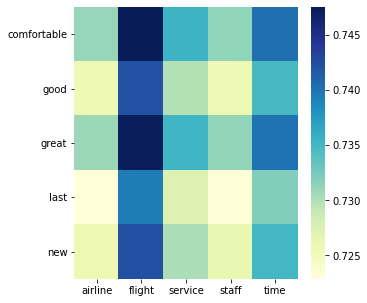

In [ ]:
heat_map_matrix_between_two_sentences(words2, words3)


*   Getting most similar words through in_built function --> MOST_SIMILAR

> This method computes cosine similarity between a simple mean of the projection weight vectors of the given words and the vectors for each word in the model. The method corresponds to the word-analogy and distance scripts in the original word2vec implementation. (https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.WordEmbeddingsKeyedVectors.most_similar)





In [ ]:
w2v.most_similar('airline',topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('food', 0.9999422430992126),
 ('customer', 0.9999407529830933),
 ('staff', 0.9999277591705322),
 ('service', 0.9999265670776367),
 ('economy', 0.9999100565910339)]

In [ ]:
w2v.most_similar('experience',topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ticket', 0.9998923540115356),
 ('plane', 0.9998880624771118),
 ('cathay', 0.9998026490211487),
 ('jakarta', 0.9996894598007202),
 ('check', 0.9996140003204346)]

In [ ]:
w2v.most_similar('food',topn=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('airline', 0.9999422430992126),
 ('customer', 0.999931275844574),
 ('service', 0.9999234676361084),
 ('economy', 0.9999073147773743),
 ('staff', 0.9999057650566101)]


*   TF-IDF to find top-2 most-common words from Test set


> Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query (http://www.tfidf.com/)




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
final = [(tagged_word[0]) for tagged_word in adjNounTest]
vectorizer = TfidfVectorizer(max_features=2)
X = vectorizer.fit_transform(final)
words = vectorizer.get_feature_names()

*   T-SNE (t-distributed stochastic neighbouring embedding)

> The visualization can be useful to understand how Word2Vec works and how to interpret relations between vectors captured from your texts before using them in neural networks or other machine learning algorithms.

> T-SNE is quite useful in case it is necessary to visualize similarity between objects which are located into multidimensional space. With a large dataset, it is becoming more and more difficult to make an easy-to-read t-SNE plot, so it is common practice to visualize groups of the most similar words.



In [ ]:
embedding_clusters = []
word_clusters = []
for word in words:
    embeddings = []
    words = []
    for similar_word, _ in w2v.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(w2v[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  




> Next, we need to configure the TSNE. So, there are a few hyperparameters, we should be aware of





*   **perplexity**: It is a value which in context of T-SNE, may be viewed as a smooth measure of the effective number of neighbours. It is related to the number of nearest neighbours that are employed in many other manifold learners
*   **n_components**: dimension of the output space
*   **n_iter**: Maximum number of iterations for optimization
*   **init**: Initialization of embedding matrix





In [ ]:
from sklearn.manifold import TSNE

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

*   Plotting the TSNE



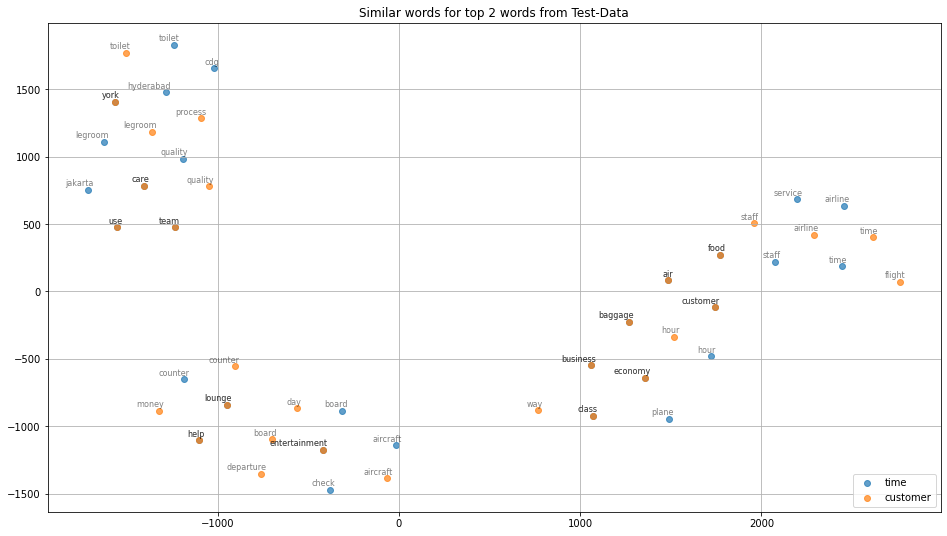

In [ ]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    '''
    This function returns a t-distributed stochastic neighbour embedding similarity plot graph.
    '''
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words for top 2 words from Test-Data', words, embeddings_en_2d, word_clusters, 0.7)

*   Interpretation of the graph

> From the Test Dataset, using TF-IDF we found that the words "Food" and "Hour" are most common. So, to find the words in the embedding that are most associated with these two words, we plotted a TSNE-plot.
As, described before, TSNE finds the nearest neighbour embedding for the words and thus, the TSNE plotted shows clusters of words that are closely embeded together.
Orange highlights the words that are associated for the word-HOUR, Blue highlights the words that are associated for the word-FOOD. and the Brown highlighted words are associated with both the words Hour and Food





#7. Helper functions for Embedding as features in Neural Model

*   Dicitionary to map words to their corresponding ids

> Replace the words and tags with their corresponding indexes and split the data into input and output tag labels






In [ ]:
def tag2Vocab (tag_words):
  '''
  Returns a dictionary.
  '''
  tag2id = {}
  #for terms in tag_words:
  for item in tag_words:
    tag = item[1]
    tag2id.setdefault(tag, len(tag2id))
  return tag2id

In [ ]:
word2id = {key: value.index for key, value in word_vector.vocab.items()}

In [ ]:
tag2id = tag2Vocab(adjNounTrain)


*   Getting an Integer Model


> Creating an integer array of the test and train dataset





In [ ]:
def intData (tag_words, word2id, tag2id):
  '''
  Returns a numpy array.
  '''
  x,y = [], []
  unk = []
  unknown_count = 0
  for w, t in tag_words:
    if w in word2id:
      y.append(tag2id.get(t))
      x.append(word2id.get(w))
    else:
      unk.append(w)
      unknown_count += 1
  print("Data created. Count of Unknown words", len(unk))
  return np.array(x), np.array(y), unk

In [ ]:
x_train, y_train, train_unk = intData(posTrain, word2id, tag2id)

Data created. Count of Unknown words 14898


In [ ]:
x_test, y_test, test_unk = intData(posTest, word2id, tag2id)

Data created. Count of Unknown words 7322


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((48791,), (19851,), (48791,), (19851,))

In [ ]:
embedding_matrix = word_vector.vectors

In [ ]:
embedding_matrix.shape

(4170, 300)


*   Adding missing words, if any




In [ ]:
def add_new_word (new_word, new_vector, new_index, embedding_matrix, word2id):
  '''
  This function adds missing words and references the embedding matrix.
  '''
  embedding_matrix = np.insert(embedding_matrix, [new_index], [new_vector], axis=0)

  word2id = {word: (index+1) if index >= new_index else index for word, index in word2id.items()}

  word2id[new_word] = new_index

  return embedding_matrix, word2id

In [ ]:
unk_vector = embedding_matrix.mean(0)

In [ ]:
common = list(set(train_unk)&set(test_unk))

In [ ]:
len(common)

1021

In [ ]:
for i in range(0, len(common)):
  embedding_matrix, word2id = add_new_word(common[i], unk_vector, 
                                           i, embedding_matrix, word2id)

In [ ]:
x_train, y_train, train_unk = intData(adjNounTrain, word2id, tag2id)
x_test, y_test, test_unk = intData(adjNounTest, word2id, tag2id)

Data created. Count of Unknown words 0
Data created. Count of Unknown words 766


In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape

((35719, 2), (14523, 2), (35719,), (14523,))

# 8. Training Neural Network

Our intention was to use the Word2Vec to extract features for adjective-noun part-of-speech tagging models and therefore, we designed a simple neural network model for multi-class classification

In [ ]:
len(embedding_matrix), len(tag2id)

(5191, 2)

In [ ]:
hidden_size = 50
batch_size = 128

def define_model(embedding_matrix, tag2id ):
  '''
  This function defines a Sequential Neural Network.
  '''
  class_count = len(tag2id)
  vocab_length = len(embedding_matrix)
  print(embedding_matrix.shape)
  model = Sequential()

  model.add(Embedding(input_dim=vocab_length, 
                      output_dim = dim, 
                      weights = [embedding_matrix],
                      input_length = 1))
  
  model.add(Flatten())

  model.add(Dense(hidden_size))

  model.add(Activation("sigmoid"))

  model.add(Dense(class_count))

  model.add(Activation("softmax"))

  model.compile(optimizer=tf.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [ ]:
pos_model = define_model(embedding_matrix, tag2id)

(5191, 300)


In [ ]:
history = pos_model.fit(x_train, y_train, epochs=10, verbose=1,  validation_data=(x_test,y_test))

Train on 35719 samples, validate on 14523 samples
Epoch 1/10
35719/35719 [==============================] - 18s 497us/step - loss: 0.3176 - accuracy: 0.8555 - val_loss: 0.2707 - val_accuracy: 0.8808
Epoch 2/10
35719/35719 [==============================] - 17s 484us/step - loss: 0.2436 - accuracy: 0.8991 - val_loss: 0.2707 - val_accuracy: 0.8805
Epoch 3/10
35719/35719 [==============================] - 17s 477us/step - loss: 0.2284 - accuracy: 0.9005 - val_loss: 0.2751 - val_accuracy: 0.8808
Epoch 4/10
35719/35719 [==============================] - 18s 490us/step - loss: 0.2215 - accuracy: 0.9021 - val_loss: 0.2768 - val_accuracy: 0.8811
Epoch 5/10
35719/35719 [==============================] - 17s 481us/step - loss: 0.2180 - accuracy: 0.9025 - val_loss: 0.2813 - val_accuracy: 0.8847
Epoch 6/10
35719/35719 [==============================] - 17s 482us/step - loss: 0.2150 - accuracy: 0.9018 - val_loss: 0.2852 - val_accuracy: 0.8827
Epoch 7/10
35719/35719 [==============================] 

Summary

In [ ]:
pos_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1, 300)            1557300   
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
activation_2 (Activation)    (None, 2)                 0         
Total params: 1,572,452
Trainable params: 1,572,452
Non-trainable params: 0
____________________________________________

#9.Evaluation of Network Model



*   Classification Report


> Build a text report showing the main classification metrics







In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = pos_model.predict(x_test)

In [ ]:
df = pd.DataFrame(predictions, columns=['NN', 'JJ'])

In [ ]:
for i in range(0, len(df)):
  if (df.NN.iloc[i] < df.JJ.iloc[i]):
    df.NN.iloc[i] = 0
    df.JJ.iloc[i] = 1
  else:
    df.NN.iloc[i] = 1
    df.JJ.iloc[i] = 0

In [ ]:
predicitons = df.to_numpy()

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      9845
           1       0.85      0.78      0.81      4678

   micro avg       0.88      0.88      0.88     14523
   macro avg       0.87      0.86      0.86     14523
weighted avg       0.88      0.88      0.88     14523
 samples avg       0.88      0.88      0.88     14523





*   ROC - AUC Score and Curve



> AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. (https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)





In [ ]:
hidden_size = 50
batch_size = 128

def define_model1():
  '''
  This function defines a Sequential Neural Network.
  '''
  class_count = len(tag2id)
  vocab_length = len(embedding_matrix)
  print(embedding_matrix.shape)
  model = Sequential()

  model.add(Embedding(input_dim=vocab_length, 
                      output_dim = dim, 
                      weights = [embedding_matrix],
                      input_length = 1))
  
  model.add(Flatten())

  model.add(Dense(hidden_size))

  model.add(Activation("sigmoid"))

  model.add(Dense(class_count))

  model.add(Activation("softmax"))

  model.compile(optimizer=tf.optimizers.Adam(),
                loss = "categorical_crossentropy",
                metrics = ["accuracy"])
  
  return model

In [ ]:
# roc curve and auc for binary label
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from matplotlib import pyplot

# generate a no skill prediction (majority class)
# fit a model
model = define_model1()
model.fit(x_train, y_train)
# predict probabilities
sq_probs = model.predict_proba(x_test)

(5191, 300)
Epoch 1/1
35719/35719 [==============================] - 17s 471us/step - loss: 0.3208 - accuracy: 0.8497


In [ ]:
# calculate scores
skill_auc = roc_auc_score(y_test, sq_probs)


# summarize scores
print('Sequential: ROC AUC=%.3f' % (skill_auc))

Sequential: ROC AUC=0.945


Changing Shape for ROC Curve

In [ ]:
x_train, y_train, train_unk = intData(adjNounTrain, word2id, tag2id)
x_test, y_test, test_unk = intData(adjNounTest, word2id, tag2id)

Data created. Count of Unknown words 0
Data created. Count of Unknown words 766


ROC Curve

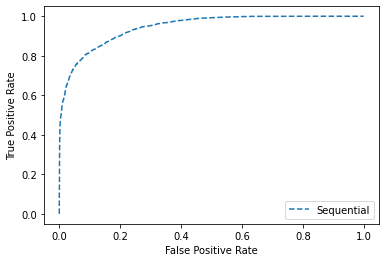

In [ ]:
sq_probs = sq_probs[:, 1]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, sq_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sequential')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# 10. Output Result

To get Testing Words

In [ ]:
test = []
for w,t in adjNounTest:
  if (w not in test_unk):
    test.append(w)

In [ ]:
new_df = pd.DataFrame(columns=['Words', 'Truth Value', 'Predicted', 'Prediciton_Probability', 'Cosine_Similarity_With_Previous_Word'])

Cosine Distances

In [ ]:
def cosine_distance_between_two_words(word1, word2):
    '''
    Takes input of words and returns the cosine distance of each word.
    '''
    return (1- scipy.spatial.distance.cosine(w2v[word1], w2v[word2]))

In [ ]:
d= []
for i in range(0, len(test)):
  try:
    dist = cosine_distance_between_two_words(test[i-1], test[i])
  except KeyError as e:
    dist = 0
  d.append(dist)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [ ]:
new_df['Words'] = test
new_df['Truth Value'] = y_test
new_df['Predicted'] = predicitons[:,1:2]
new_df['Prediciton_Probability'] = sq_probs
new_df['Cosine_Similarity_With_Previous_Word'] = d

In [ ]:
new_df.head()

,Words,Truth Value,Predicted,Prediciton_Probability,Cosine_Similarity_With_Previous_Word
0,mumbai,0,0.0,0.127098,0.924267
1,time,0,0.0,0.001646,0.972271
2,minute,0,0.0,0.340477,0.946484
3,everything,0,0.0,0.007644,0.887803
4,time,0,0.0,0.001646,0.988513


**Explanation**


> As seen above, the word **TIME** has a truth value of 0, denoting that it is a Noun Word. Our prediciton for the same has been 0  as well.
The prediciton probability for Noun Words = (1 - Probability(Adjective Words)) 
Also, time has a 0.972 cosine similarity with the previous word Mumbai and the word **MINUTE** has a 0.9464 similarity with the word time. 
That means, wherever we will find the word **TIME** the noun word **Mumbai** and **Minute** will also be occuring.
Therefore letting us know about the contextual embedding of our dataset.




In [ ]:
new_df.to_csv(path+'Result.csv')